In [32]:
import numpy as np
import pandas as pd
import folium

In [ ]:
# 날씨 데이터, 시내시외 데이터 

In [78]:
train = pd.read_csv("/Users/kimmiso/Desktop/Dataworkspace/bus_predict/train.csv")

In [16]:
test = pd.read_csv("/Users/kimmiso/Desktop/Dataworkspace/bus_predict/test.csv")

In [17]:
train

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,405328102,7983486,281-2,33.255783,126.577450,비석거리,21시,528.0,삼아아파트,33.251896,126.574417,96
210453,210453,2019-10-28,405328102,7983486,281-2,33.248595,126.568527,동문로터리,21시,280.0,매일올레시장 7번입구,33.249753,126.565959,50
210454,210454,2019-10-28,405328102,7983486,281-2,33.251891,126.560303,서귀포시 구 버스터미널,21시,114.0,아랑조을거리 입구,33.251084,126.559551,16
210455,210455,2019-10-28,405328102,7983486,281-2,33.251084,126.559551,아랑조을거리 입구,21시,223.0,평생학습관,33.249504,126.558068,38


In [19]:
def outlier_iqr(data, column): 

    # lower, upper 글로벌 변수 선언하기     
    global lower, upper    
    
    # 4분위수 기준 지정하기     
    q25, q75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)          
    
    # IQR 계산하기     
    iqr = q75 - q25    
    
    # outlier cutoff 계산하기     
    cut_off = iqr * 1.5          
    
    # lower와 upper bound 값 구하기     
    lower, upper = q25 - cut_off, q75 + cut_off     
    
    print('IQR은',iqr, '이다.')     
    print('lower bound 값은', lower, '이다.')     
    print('upper bound 값은', upper, '이다.')    
    
    # 1사 분위와 4사 분위에 속해있는 데이터 각각 저장하기     
    data1 = data[data[column] > upper]     
    data2 = data[data[column] < lower]    
    
    # 이상치 총 개수 구하기
    return print('총 이상치 개수는', data1.shape[0] + data2.shape[0], '이다.')
    

In [73]:
outlier_iqr(train, "next_arrive_time")

IQR은 58.0 이다.
lower bound 값은 -43.0 이다.
upper bound 값은 189.0 이다.
총 이상치 개수는 11112 이다.


In [79]:
train = train["distance"].loc(7000:)

SyntaxError: invalid syntax (<ipython-input-79-f3abaa0afb8f>, line 1)

In [77]:
train

7000      568.0
7001      216.0
7002      513.0
7003      361.0
7004      466.0
          ...  
210452    528.0
210453    280.0
210454    114.0
210455    223.0
210456    189.0
Name: distance, Length: 203457, dtype: float64

In [23]:
outlier_iqr(train, "next_arrive_time")

IQR은 58.0 이다.
lower bound 값은 -43.0 이다.
upper bound 값은 189.0 이다.
총 이상치 개수는 11112 이다.


In [105]:
test

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude
0,210457,2019-10-29,405136001,7997025,360-1,33.457724,126.554014,제대마을,07시,333.0,제대아파트,33.458783,126.557353
1,210458,2019-10-29,405136001,7997025,360-1,33.458783,126.557353,제대아파트,07시,415.0,제주대학교,33.459893,126.561624
2,210459,2019-10-29,405136001,7997025,360-1,33.478867,126.483833,한라중학교/부영아파트,08시,417.0,대림2차아파트,33.478850,126.488350
3,210460,2019-10-29,405136001,7997025,360-1,33.478850,126.488350,대림2차아파트,08시,334.0,연동대림1차아파트,33.480700,126.489933
4,210461,2019-10-29,405136001,7997025,360-1,33.480700,126.489933,연동대림1차아파트,08시,550.0,케이티앤지,33.482077,126.485355
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91769,302350,2019-11-05,405328102,7983486,281-2,33.493625,126.534764,제주지방법원(광양방면),20시,272.0,고산동산(광양방면),33.495540,126.532907
91770,302351,2019-11-05,405328102,7983486,281-2,33.495540,126.532907,고산동산(광양방면),20시,447.0,제주시청(광양방면),33.498925,126.530351
91771,302352,2019-11-05,405328102,7983486,281-2,33.498925,126.530351,제주시청(광양방면),20시,418.0,광양사거리,33.500473,126.527103
91772,302353,2019-11-05,405328102,7983486,281-2,33.500473,126.527103,광양사거리,20시,140.0,탐라장애인 종합복지관,33.500228,126.525625


In [106]:
# 학습 데이터 정보 출력
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210457 entries, 0 to 210456
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                210457 non-null  int64  
 1   date              210457 non-null  object 
 2   route_id          210457 non-null  int64  
 3   vh_id             210457 non-null  int64  
 4   route_nm          210457 non-null  object 
 5   now_latitude      210457 non-null  float64
 6   now_longitude     210457 non-null  float64
 7   now_station       210457 non-null  object 
 8   now_arrive_time   210457 non-null  object 
 9   distance          210457 non-null  float64
 10  next_station      210457 non-null  object 
 11  next_latitude     210457 non-null  float64
 12  next_longitude    210457 non-null  float64
 13  next_arrive_time  210457 non-null  int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 22.5+ MB


In [107]:
train.head(20)

#next_arrive_time = 예측값

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64
5,5,2019-10-15,405136001,7997025,360-1,33.478867,126.483833,한라중학교/부영아파트,07시,417.0,대림2차아파트,33.478850,126.488350,160
6,6,2019-10-15,405136001,7997025,360-1,33.478850,126.488350,대림2차아파트,07시,334.0,연동대림1차아파트,33.480700,126.489933,58
7,7,2019-10-15,405136001,7997025,360-1,33.482142,126.483213,롯데마트,07시,341.0,원노형,33.483446,126.480758,64
8,8,2019-10-15,405136001,7997025,360-1,33.483446,126.480758,원노형,07시,185.0,노형오거리,33.485854,126.480530,54
9,9,2019-10-15,405136001,7997025,360-1,33.485854,126.480530,노형오거리,07시,252.0,남녕고등학교,33.488046,126.483112,204


In [63]:
data_365_22 = train[train.route_nm == "365-22"]

In [64]:
new_data = data_365_22.groupby(["vh_id","now_arrive_time"])['next_arrive_time'].median().reset_index()

new_data = data_365_22.pivot_table(index=["vh_id"],columns="now_arrive_time",values="next_arrive_time")

In [66]:
new_data

now_arrive_time,05시,06시,07시,08시,09시,10시,11시,12시,13시,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시
vh_id,,,,,,,,,,,,,,,,,,,
7997002,50.000000,92.047244,95.610526,100.712329,97.726619,91.536232,101.875000,89.176471,99.436242,92.333333,100.430380,110.582677,119.244444,106.534653,113.821429,94.909091,91.986301,81.543860,NaN
7997004,433.333333,97.042553,96.037736,104.389937,90.173913,96.533333,94.218750,91.200000,97.191489,100.878788,113.864662,94.465116,112.590476,120.583851,103.678161,93.044444,101.740741,81.641791,NaN
7997022,2468.000000,88.571429,102.213836,103.287671,103.736842,117.794118,98.680272,100.140351,104.895238,102.386207,99.354331,103.353535,138.068966,119.278481,106.372093,95.269231,92.968750,96.981818,48.800000
7997032,NaN,102.940397,93.745856,110.958678,94.371795,89.928058,96.261682,99.086093,103.348485,90.560000,101.966387,99.113402,111.871429,123.894737,112.115942,94.796875,92.402985,74.526316,NaN
7997056,2226.666667,112.755556,91.441558,119.173333,110.038462,96.858757,93.851852,95.076923,97.922652,101.197183,90.765957,108.230088,108.819444,156.862745,100.783505,98.261438,99.754601,88.695652,44.666667
7997062,NaN,117.188406,96.406977,95.164179,102.977778,96.825397,93.581818,86.627451,129.392857,101.620253,89.673469,114.405405,106.909091,128.112150,95.512821,103.350427,97.342282,92.661017,34.000000
7997085,168.000000,94.295652,98.600000,101.408451,89.896296,102.344086,97.012739,94.832215,91.185841,102.923077,100.897436,107.491525,103.500000,126.177778,107.256831,84.875000,98.410256,78.342857,38.000000
7997086,36.250000,85.777778,97.217391,100.458333,91.284553,98.121739,95.038760,100.336634,99.069767,100.541353,97.148515,104.796748,108.932039,118.046154,98.405594,89.854015,99.381818,83.448980,31.500000
7997090,31.333333,80.313253,104.691729,106.464286,96.965517,110.000000,95.479675,96.913907,102.684211,102.943662,96.630769,102.934307,123.941176,123.371429,108.687898,95.820896,97.584416,85.575758,NaN


In [35]:
train = train.loc (train['route_nm']=='360-1')

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [46]:
train1 = train.loc[ (train['now_station']=='제주대학교입구') & (train['next_station']=='제대마을')]

In [47]:
train1.groupby("route_nm").mean()

,id,route_id,vh_id,now_latitude,now_longitude,distance,next_latitude,next_longitude,next_arrive_time
route_nm,,,,,,,,,
360-1,97045.982353,405136001.0,7.997060e+06,33.456267,126.55175,266.0,33.457724,126.554014,29.184314
365-22,100810.257261,405136522.0,7.997074e+06,33.456267,126.55175,266.0,33.457724,126.554014,30.131397


In [108]:
train.describe()

,id,route_id,vh_id,now_latitude,now_longitude,distance,next_latitude,next_longitude,next_arrive_time
count,210457.000000,2.104570e+05,2.104570e+05,210457.000000,210457.000000,210457.000000,210457.000000,210457.000000,210457.000000
mean,105228.000000,4.052491e+08,7.988694e+06,33.434528,126.603451,490.256100,33.434711,126.603687,85.380824
std,60753.847139,9.132404e+04,6.774077e+03,0.102350,0.123961,520.563932,0.102224,0.123838,85.051170
min,0.000000,4.051360e+08,7.983000e+06,33.244382,126.473300,97.000000,33.244382,126.473300,6.000000
25%,52614.000000,4.051365e+08,7.983093e+06,33.325283,126.523900,291.000000,33.325283,126.524550,44.000000
50%,105228.000000,4.053201e+08,7.983431e+06,33.484667,126.551050,384.000000,33.484860,126.551050,66.000000
75%,157842.000000,4.053201e+08,7.997041e+06,33.500197,126.650322,542.000000,33.500228,126.650322,102.000000
max,210456.000000,4.053281e+08,7.997124e+06,33.556167,126.935188,7461.000000,33.556167,126.935188,2996.000000


In [5]:
# 범주 개수 체크
for col in train.columns:
    if train[col].dtype == 'object':
        categories = train[col].unique()
        print(f'[{col}] ({len(categories)})')
        print('\n'.join(categories))
        print()

[date] (14)
2019-10-15
2019-10-16
2019-10-17
2019-10-18
2019-10-19
2019-10-20
2019-10-21
2019-10-22
2019-10-23
2019-10-24
2019-10-25
2019-10-26
2019-10-27
2019-10-28

[route_nm] (21)
360-1
360-2
360-7
360-12
365-21
365-22
201-11
201-12
201-13
201-14
201-15
201-16
201-17
201-18
201-21
201-22
201-24
201-26
201-27
281-1
281-2

[now_station] (348)
제주대학교입구
제대마을
제대아파트
남국원(아라방면)
도호동
한라중학교/부영아파트
대림2차아파트
롯데마트
원노형
노형오거리
남녕고등학교
한라병원
삼무공원사거리
제원아파트
은남동
연동주민센터
제주도청 신제주로터리
월구마을
동성마을
제주버스터미널
한국병원
남서광마을입구
남서광마을
탐라장애인 종합복지관
제주시청(아라방면)
고산동산(아라방면)
제주지방법원(아라방면)
아라초등학교
아라주공아파트
인다마을
남국사
연동대림1차아파트
케이티앤지
제주중앙여자고등학교(아라방면)
제주여자중고등학교(아라방면)
제주대학교병원
연동입구
오라3동
죽성마을 입구
제주대학교
부영아파트
제주시청(광양방면)
고산동산(광양방면)
제주여자중고등학교(광양방면)
아라동주민센터
남국원(광양방면)
제주지방법원(광양방면)
제주중앙여자고등학교(광양방면)
웃 인다 마을
제주대학교 입구
광양사거리
홍랑로입구
용천마을
동산교
오라오거리
명신마을
월랑마을 남녕고등학교
제주제일고등학교
으뜸마을
탐라도서관
제주고등학교/중흥S클래스
보성시장
시민회관
중앙로(현대약국)
관덕정
서문시장
용담1동주민센터
용문사거리
용문마을
용문마을회관
화물청사입구
중흥S클래스아파트
시티주유소
다호마을
제주국제공항(신제주방면)
노형초등학교
제주국제공항(구제주방면)
월성 마을
제주중학교/제주향교
중앙로(국민은행)
삼성초등학교
광양
제주한라대

In [109]:
#route_nm을 기준으로 groupby -> 평균값 도출
train.groupby("route_nm").mean()

,id,route_id,vh_id,now_latitude,now_longitude,distance,next_latitude,next_longitude,next_arrive_time
route_nm,,,,,,,,,
201-11,103543.146928,405320111.0,7.983050e+06,33.429789,126.731327,480.826219,33.429250,126.731329,68.901710
201-12,107822.993429,405320112.0,7.983082e+06,33.421058,126.717562,473.234942,33.421648,126.717347,67.602392
201-13,104085.344736,405320113.0,7.983075e+06,33.422851,126.722697,470.624857,33.422361,126.722501,68.403649
201-14,110290.011001,405320114.0,7.983087e+06,33.420462,126.716435,473.730441,33.421008,126.716088,66.634818
201-15,115381.517693,405320115.0,7.983096e+06,33.418380,126.728218,493.411970,33.417860,126.728171,71.313237
201-16,104838.260630,405320116.0,7.983081e+06,33.419501,126.711910,475.206200,33.420028,126.711629,68.122969
201-17,105463.465896,405320117.0,7.983125e+06,33.420900,126.722254,480.883183,33.420335,126.722109,69.239122
201-18,108878.115324,405320118.0,7.983201e+06,33.416137,126.710016,466.516028,33.416543,126.709675,67.643471
201-21,111941.088015,405320121.0,7.983092e+06,33.417834,126.717021,474.281648,33.417328,126.717076,65.985019


In [110]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
# 내부에 결과를 출력하도록 설정
%matplotlib inline

In [112]:
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

In [113]:
# 경고 메시지 숨기기
import warnings
warnings.filterwarnings('ignore')

In [114]:
# 학습 데이터 복사본 생성
train_ = train.copy()

<AxesSubplot:>

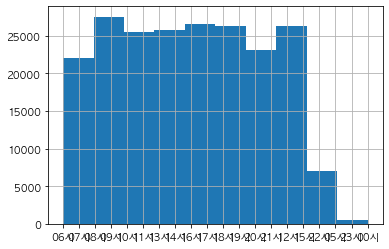

In [115]:
# 도착시간과 예측시간의 분포 분석
times = train_['now_arrive_time']
times.hist()

<AxesSubplot:>

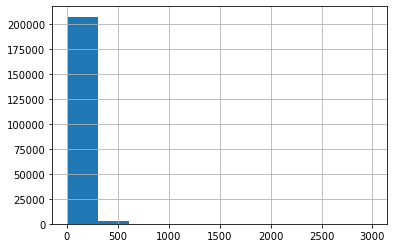

In [9]:
target = train['next_arrive_time']
target.hist()

<AxesSubplot:xlabel='next_arrive_time', ylabel='Density'>

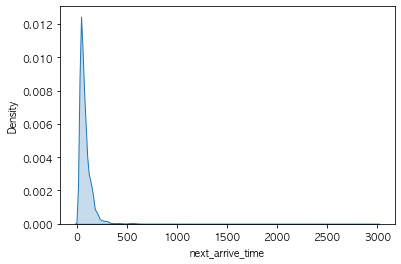

In [117]:
sns.kdeplot(target, shade=True)

In [10]:
# target 분포 확인
train.groupby('next_arrive_time').size()

next_arrive_time
6         7
8        36
10       71
12      164
14      397
       ... 
2888      1
2906      2
2930      1
2966      1
2996      1
Length: 596, dtype: int64

In [11]:
train.groupby('distance').mean()

,id,route_id,vh_id,now_latitude,now_longitude,next_latitude,next_longitude,next_arrive_time
distance,,,,,,,,
97.0,112093.250794,4.053201e+08,7.983091e+06,33.515183,126.557067,33.514637,126.556243,17.657143
110.0,91456.000000,4.053201e+08,7.983063e+06,33.263659,126.622687,33.263154,126.621621,39.000000
114.0,112296.569111,4.053243e+08,7.983269e+06,33.251370,126.559818,33.251605,126.560036,45.833568
120.0,109459.880282,4.053201e+08,7.983074e+06,33.251717,126.559880,33.251463,126.559645,38.295775
134.0,103934.092527,4.053201e+08,7.983090e+06,33.465523,126.935079,33.465724,126.935007,22.868327
...,...,...,...,...,...,...,...,...
3469.0,104057.404494,4.053281e+08,7.983444e+06,33.334694,126.610370,33.315950,126.596733,197.685393
4397.0,110292.517241,4.053281e+08,7.983434e+06,33.395307,126.619388,33.409190,126.617887,307.771552
4429.0,107021.625000,4.053281e+08,7.983447e+06,33.409678,126.617649,33.394189,126.619321,309.953488


In [120]:
# 변수1: 날짜 (데이터타입 바꾸기)
train['date'] = pd.to_datetime(train['date'])
train['date'] 

0        2019-10-15
1        2019-10-15
2        2019-10-15
3        2019-10-15
4        2019-10-15
            ...    
210452   2019-10-28
210453   2019-10-28
210454   2019-10-28
210455   2019-10-28
210456   2019-10-28
Name: date, Length: 210457, dtype: datetime64[ns]

In [121]:
train['weekday'] = train['date'].dt.strftime('%a')
train['weekday']

0         Tue
1         Tue
2         Tue
3         Tue
4         Tue
         ... 
210452    Mon
210453    Mon
210454    Mon
210455    Mon
210456    Mon
Name: weekday, Length: 210457, dtype: object

<AxesSubplot:xlabel='weekday', ylabel='next_arrive_time'>

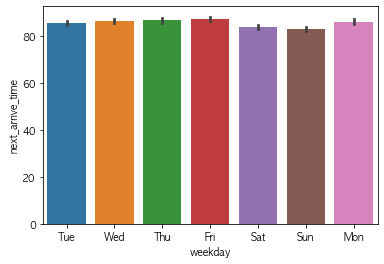

In [122]:
# 요일별 평균 소요시간
sns.barplot(x='weekday', y='next_arrive_time', data=train)

<AxesSubplot:xlabel='now_arrive_time', ylabel='count'>

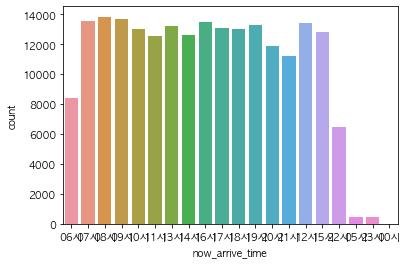

In [123]:
# 시간대별 소요시간 (count)
sns.countplot(x = train['now_arrive_time'])

In [6]:
train_.groupby('next_arrive_time').size()

NameError: name 'train_' is not defined

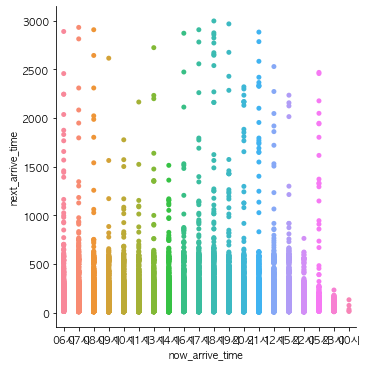

In [125]:
sns.catplot(x="now_arrive_time", y="next_arrive_time", kind='strip', jitter=False, data=train)

In [126]:
# 시간별 평균 소요시간
train['time_group'] = ''

train.loc[ (train['now_arrive_time']>='05시') & (train['now_arrive_time']<'12시') ,['time_group'] ]= 'morning' # 05~11시
train.loc[ (train['now_arrive_time']>='12시') & (train['now_arrive_time']<'18시') ,['time_group'] ]= 'afternoon' #12~17시
train.loc[ (train['now_arrive_time']>='18시') | (train['now_arrive_time']=='00시'),['time_group'] ]= 'evening' #18~00시

train = pd.get_dummies(train,columns=['time_group']) # 원 핫 인코딩을 수행
train = train.drop('now_arrive_time', axis=1) # 필요없는 now_arrive_time drop
train.head()

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,distance,next_station,next_latitude,next_longitude,next_arrive_time,weekday,time_group_afternoon,time_group_evening,time_group_morning
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,266.0,제대마을,33.457724,126.554014,24,Tue,0,0,1
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,333.0,제대아파트,33.458783,126.557353,36,Tue,0,0,1
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,415.0,제주대학교,33.459893,126.561624,40,Tue,0,0,1
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42,Tue,0,0,1
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,374.0,은남동,33.485822,126.490897,64,Tue,0,0,1


Text(0, 0.5, 'time')

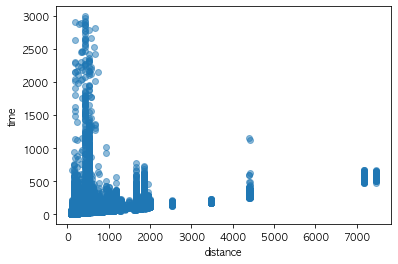

In [127]:
# 거리, 소요시간 상관관계
x = train['distance'].values
y = train['next_arrive_time'].values
plt.scatter(x, y, alpha=0.5)
plt.xlabel('distance')
plt.ylabel('time')

In [128]:
import geopy.distance 

In [131]:
# test와 train에 출발 정류장과 도착 정류장 사이의 직선거리를 추가함

dist = [geopy.distance.geodesic((i, j), (k, l)).km for i, j, k, l in

        list(zip(train['now_latitude'], train['now_longitude'], train['next_latitude'], train['next_longitude']))]

train['dist_line'] = dist

dist = [geopy.distance.geodesic((i, j), (k, l)).km for i, j, k, l in

        list(zip(test['now_latitude'], test['now_longitude'], test['next_latitude'], test['next_longitude']))]

test['dist_line'] = dist



Y_train = list(train['next_arrive_time'])

In [133]:
train

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,distance,next_station,next_latitude,next_longitude,next_arrive_time,weekday,time_group_afternoon,time_group_evening,time_group_morning,dist_line
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,266.0,제대마을,33.457724,126.554014,24,Tue,0,0,1,0.265361
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,333.0,제대아파트,33.458783,126.557353,36,Tue,0,0,1,0.331896
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,415.0,제주대학교,33.459893,126.561624,40,Tue,0,0,1,0.415706
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42,Tue,0,0,1,0.577617
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,374.0,은남동,33.485822,126.490897,64,Tue,0,0,1,0.374588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,405328102,7983486,281-2,33.255783,126.577450,비석거리,528.0,삼아아파트,33.251896,126.574417,96,Mon,0,1,0,0.515489
210453,210453,2019-10-28,405328102,7983486,281-2,33.248595,126.568527,동문로터리,280.0,매일올레시장 7번입구,33.249753,126.565959,50,Mon,0,1,0,0.271597
210454,210454,2019-10-28,405328102,7983486,281-2,33.251891,126.560303,서귀포시 구 버스터미널,114.0,아랑조을거리 입구,33.251084,126.559551,16,Mon,0,1,0,0.113673
210455,210455,2019-10-28,405328102,7983486,281-2,33.251084,126.559551,아랑조을거리 입구,223.0,평생학습관,33.249504,126.558068,38,Mon,0,1,0,0.223174


Text(0, 0.5, 'time')

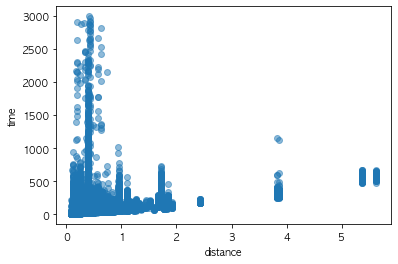

In [136]:
# 거리, 소요시간 상관관계
x = train['dist_line'].values
y = train['next_arrive_time'].values
plt.scatter(x, y, alpha=0.5)
plt.xlabel('distance')
plt.ylabel('time')